# DEEP LEARNING 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-digits-dataset/X.npy
/kaggle/input/sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy


(-0.5, 63.5, 63.5, -0.5)

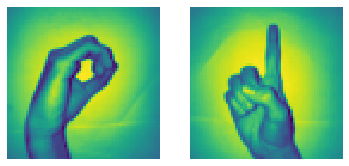

In [2]:
x_l = np.load('/kaggle/input/sign-language-digits-dataset/X.npy') #resimler
y_l = np.load('/kaggle/input/sign-language-digits-dataset/Y.npy') #labellar
img_size=64
plt.subplot(1,2,1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off') #x ve y kısımlarını kapatma 
plt.subplot(1,2,2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In [3]:
X = np.concatenate(( x_l[204:409], x_l[822:1027] ), axis=0)
X.shape

(410, 64, 64)

In [4]:
X = np.concatenate(( x_l[204:409], x_l[822:1027] ), axis=0)
#from 0 to 244 is 0 sign and from 205 to 410 is one sign

z = np.zeros(205) #label
o = np.ones(205) #label
Y = np.concatenate( (z,o),axis=0).reshape(X.shape[0],1) #yukarıdan asagıya concataneta etme
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


## Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
number_of_Ytrain = Y_train
number_of_Ytest = Y_test.size

In [6]:
print("number_of_train: ",number_of_train)
print("number_of_test: ",number_of_test)
print("number_of_Ytrain: ",number_of_train)
print("number_of_Ytest: ",number_of_Ytest)

number_of_train:  348
number_of_test:  62
number_of_Ytrain:  348
number_of_Ytest:  62


In [7]:
# X = 410, 64, 64 (3 boyutlu matris)
# Y = 410,1 ( 2boyutlu matris)
#flatten : 2 boyutlu hale getirme

X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])

print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


Transpose alacagız.
matrix çarpımı için gerekli

In [8]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


## 2 Layer Neural Network
* Size of layers and initializing parameters weights and bias
* Forward propagation
* Loss and Cost function
* Backward Propagation
* Update Parameters
* Prediction with learnt parameters weight and bias
* Create Model

### 1. Size of layers and initializing parameters weights and bias
1. w[1]
2. w[2]
3. b[1]
4. b[2] 

olmak üzere 4 tane initialize etmemek ve güncellememiz gereken parametre var
> Logistin Regressionda biası 0, weightleri 0.01 olarak initialize etmiştik.
> Şimdi; biası yine 0 yapacağız, Weighti random olarak initialize yapacağız.

In [9]:
x_train.shape

(4096, 348)

In [10]:
print(" x_train.shape[0]",  x_train.shape[0])
print(" y_train.shape[0]",  y_train.shape[0])

 x_train.shape[0] 4096
 y_train.shape[0] 1


In [11]:
a = np.random.randn(3)
a

array([ 1.33840785, -0.08782757, -0.51328268])

In [12]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1, #3,4096
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
        
    return parameters

parameters = initialize_parameters_and_layer_sizes_NN(x_train,y_train)
print(parameters['weight1'].shape)
print(parameters['bias1'].shape)
print(parameters['weight2'].shape)
print(parameters['bias2'].shape)

(3, 4096)
(3, 1)
(1, 3)
(1, 1)


z[1] = w[1] * x + b[1]
> w[1] = (3,4096) | x(4096,1) | b(3,1) matirs boyutları 

> z[1] == A[1] (3,1) 

z[2] = w[2] * A[1] + b[2]

>  w(1,3) | a1(3,1) | b2(1,1)

> z[2] == A[2] (1,1) 


## Forward Propagation
* Forward propagation is almost same with logistic regression.
* The only difference is we use **tanh function** and we make all process twice.
* Also numpy has tanh function. So we do not need to implement it.

In [13]:
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

## Loss and Cost function
* Loss and cost functions are same with logistic regression
* Cross entropy function
![losscossfun](https://image.ibb.co/nyR9LU/as.jpg)

In [14]:
# Compute cost
def compute_cost_NN(A2, Y):
    logprobs = np.multiply(np.log(A2),Y) # loss
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

## Backward Propagation
* As you know backward propagation means derivative.
* If you want to learn (as I said I cannot explain without talking bc it is little confusing), please watch video in youtube.
* However the logic is same, lets write code.

In [15]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

## Update Parameters
* Updating parameters also same with logistic regression.
* We actually do alot of work with logistic regression

In [16]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

## Prediction with learnt parameters weight and bias¶
* Predict method that is like logistic regression.

In [17]:
#  prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

## Create Model
* Lets put them all together


In [18]:
# Sigmoid

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

Cost after iteration 0: 0.300476
Cost after iteration 100: 0.328044
Cost after iteration 200: 0.338618
Cost after iteration 300: 0.342554
Cost after iteration 400: 0.344002
Cost after iteration 500: 0.344532
Cost after iteration 600: 0.344724
Cost after iteration 700: 0.344793
Cost after iteration 800: 0.344816
Cost after iteration 900: 0.344823
Cost after iteration 1000: 0.344824
Cost after iteration 1100: 0.344823
Cost after iteration 1200: 0.344822
Cost after iteration 1300: 0.344820
Cost after iteration 1400: 0.344818
Cost after iteration 1500: 0.344817
Cost after iteration 1600: 0.344815
Cost after iteration 1700: 0.344813
Cost after iteration 1800: 0.344812
Cost after iteration 1900: 0.344811
Cost after iteration 2000: 0.344809
Cost after iteration 2100: 0.344808
Cost after iteration 2200: 0.344807
Cost after iteration 2300: 0.344805
Cost after iteration 2400: 0.344804
Cost after iteration 2500: 0.344803
Cost after iteration 2600: 0.344802


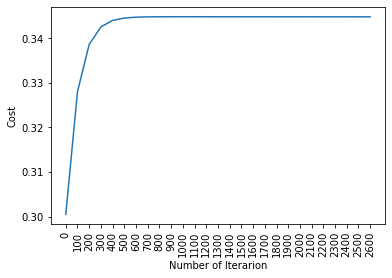

train accuracy: 50.57471264367816 %
test accuracy: 46.7741935483871 %


In [19]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2700)